In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sqlite3 
import project_1_1 as pj1

# 1	Problem statement
In this task, this project is trying to answer a simple question
* is playing at home consider as an advantage for the home team in the English premier league? 

The data that has been used in this project is gathered form open source database Kaggle. this data consists of the results for 11 European competitions’ matches. Here I will just focus in the English premier league but using the same script the analysis can be done for different countries. Furthermore, when focusing in single season the report just focuses in 2008/2009 and 2009/2010 seasons, but it can be done for any other season in the data using the same script.


# 2 Data wrengling and cleaning
### the cleaning phase or the extraction phase consists of some stages 
* the use of **get_id_from_a_table function defined in project_1** using this function we can get the unique id for a country or a team from the "country/team " tables as following.


In [18]:
Manchester_united_id=pj1.get_id_from_a_table (Table_name='Team',id_column_name='team_api_id',country_team_name='Manchester United',country_team_column_name='team_long_name')
England_id=pj1.get_id_from_a_table (Table_name='Country',id_column_name='id',country_team_name='England',country_team_column_name='name')
print('Manchester united ID is',Manchester_united_id)
print('England ID is ',England_id)

Manchester united ID is 10260.0
England ID is  1729.0


* using this id we can get from the "Match" table all the data"rows" associated with this id number for the column "home team goal" and "away team goal" then I am adding third column to define the results of the home team "win,lose or draw" depends on which teams score more goals. this step is defined in season_results_for_a_team_or_country. this will return a pandas series with the result for this specific team/country in specific season.

In [19]:
Manchester_united_result_for_2009_2010=pj1.season_results_for_a_team_or_country(table_name='Team',
                                id_column_name='team_api_id',country_team_name='Manchester United',country_team_column_name='team_long_name',
                                                                               column_name_in_match_table='home_team_api_id',season='2008/2009')
Manchester_united_result_for_2009_2010.columns=['Manchester United goals','Away team goals','Result for Manchester United']

Manchester_united_result_for_2009_2010.head()

,Manchester United goals,Away team goals,Result for Manchester United
1728,1.0,1.0,draw
1738,2.0,0.0,win
1748,4.0,3.0,win
1768,5.0,0.0,win
1798,1.0,0.0,win


* the next phase is creating either a percentage of the matches won by the home game and that can be achieved by deviding the number of games won by a home team by the whole number of games using this function **percentage_of_winning_losing_for_home_team** or create number of winning games vs number of losing games from the sum of all elements with keyword 'win' 'lose' or 'draw' using the function **number_of_games_that_home_team_wins_or_lose_in_a_season**


In [20]:
Manchester_united_result_for_2009_2010=pj1.season_results_for_a_team_or_country(table_name='Team',
                                id_column_name='team_api_id',country_team_name='Manchester United',country_team_column_name='team_long_name',
                                                                               column_name_in_match_table='home_team_api_id',season='2008/2009')
print(pj1.percentage_of_winning_losing_for_home_team(Manchester_united_result_for_2009_2010))
print(pj1.number_of_games_that_home_team_wins_or_lose_in_a_season(Manchester_united_result_for_2009_2010))

(84.21052631578947, 5.263157894736842)
(16, 1)


**Importnat Note** : The data for the English premier league were complete and all the 380 games for 8 seasons were provided.
When conducting the analysis for the 8 season and 380 games per season in England the data that were used were “home team goal” “away team goal” using the country id that we got from the function “get_id_from_a_table”.When conduction the analysis for each season the search was per team id from the same function.
The two function get_id_from_a_table and season_results_for_a_team_or_country was used to clean data and produce the data as described above.

* The last phase was introducing the result as we will see it later in the project . the function that has been used to perform this phase were **create_data_frame_to_plot_result** this function takes the same arguments as **season_results_for_a_team_or_country** but it can take multiple teams and multiple seasons . also , it takes "argv" as input which a function can be used to deliver several inputs arrgument which in my case could be three or four arguments as following *argv :  the first two arguments are the label of your two data. 
    the third argument can be true or false depending on which analysis you want to conduct percentage or number of games 
    the last argument is 'away_team_api_id' if needed . this is a helper function so I am using a main code to run this function this main script is in  run_script  run script first argument is the third argumnet for this *argv so it is True if you want to calculate number of games and false if the percentage is required also there is an option to just try the function as the analysis is taking a little bit long time almost a decade :D. I am kidding ofcourse just 10 minutes maybe .so you can just add True as second argument and it should just run it once with England as team and we are calculating the analysis for 2008/2009 seasons till 2015/2016 seasons 

In [21]:
conduct_analysis_to_calculate_number_of_games=True
result_England_multiple_seasons=pj1.run_script(conduct_analysis_to_calculate_number_of_games,True)
result_England_multiple_seasons.columns=['Home Team wins','Away team wins']
result_England_multiple_seasons.head()

Home Team wins  Away team wins
England 09             173             110
        10             193              91
        11             179              90
        12             171             116
        13             166             106

# 3 Analysis 
## Do home teams really have advantage from playing at home ?


the variables we have in this analysis is :
* ) the amount of wins at home defined by the number of wins to the total played games( home wins vs home losses )(percentage of home wins from the home game wins) . 
* ) How strong the team is defined by the total point gained in the season where the analysis is conducted . determined by the league positions. (percentage of home wins in relation to how powerful the team is )
* ) the amount of wins at home in comparison to the total wins (home and away wins )(percentage of home wins from the total wins). 

<font color='red'> Important Note :The next part is where I am calling to run the python script described in project1_1
 if you want to run the python script you can run the next cell it will take approximatly 15 minutes 

In [1]:
## Note this cell is to generate all the data required to perform all the coming plots just run it once it take time to run almost(12 minutes )
conduct_analysis_to_calculate_number_of_games=False
data_1=pj1.run_script(conduct_analysis_to_calculate_number_of_games)
conduct_analysis_to_calculate_number_of_games=True
data_2=pj1.run_script(conduct_analysis_to_calculate_number_of_games)


that is the motivation behind creating the data and save it again as csv files to have it ready for usage without that 12 minutes run but you can try it for your self the code is already given . the next part is to generate the csv files 

In [2]:
data_1[0][0].to_csv('percentage_of_wins_home_and_away_in_2009.csv')
data_1[0][1].to_csv('percentage_of_wins_vs_losses_at_home_in_2009.csv')
data_1[1][0].to_csv('percentage_of_wins_home_and_away_in_2010.csv')
data_1[1][1].to_csv('percentage_of_wins_vs_losses_at_home_in_2010.csv')
data_1[2].to_csv('percentage_of_wins_vs_losses_at_home_in_England_in_multiple_seasons.csv')
data_2[0][0].to_csv('number_of_wins_home_and_away_in_2009.csv')
data_2[0][1].to_csv('number_of_wins_vs_losses_at_home_in_2009.csv')
data_2[1][0].to_csv('number_of_wins_home_and_away_in_2010.csv')
data_2[1][1].to_csv('number_of_wins_vs_losses_at_home_in_2010.csv')
data_2[2].to_csv('number_of_wins_vs_losses_at_home_in_England_in_multiple_seasons.csv')


When taking a first look at the data given  in the next Figure you can see a clear advantage for the home teams in comparison to the away teams but is the advantage really clear as appear in the data ?

Text(0, 0.5, 'the percentage in %')

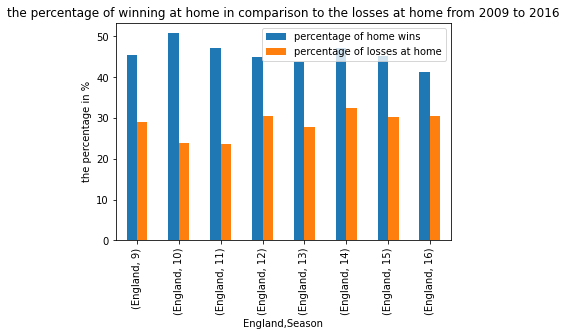

In [1]:
Labels=['England','Season','percentage of home wins','percentage of losses at home']
result=pd.read_csv('percentage_of_wins_vs_losses_at_home_in_England_in_multiple_seasons.csv',header=0,names=Labels,index_col=['England','Season'])
result.plot.bar()
plt.title('the percentage of winning at home in comparison to the losses at home from 2009 to 2016')
plt.ylabel('the percentage in %')


**Figure 1 winning vs losing percentage rate for home team in England**

When taking a deeper look at the data you can see that the teams in the upper half of the table have advantage when they play at home. A team such as Liverpool didn’t lose at home, despite drawing a lot, but yet their home record of not losing in a season is impressive record. Furthermore, the champion Manchester united has almost more than 80% winning percentage at home which indicate clear advantage for the home teams. Despite that, the data from the teams from 12th to 20th doesn`t support this claim at all. the 8 teams have more, or equal home losses record than their winning record in 2008 /2009 as shown in the next figure 

Text(0, 0.5, 'the percentage in %')

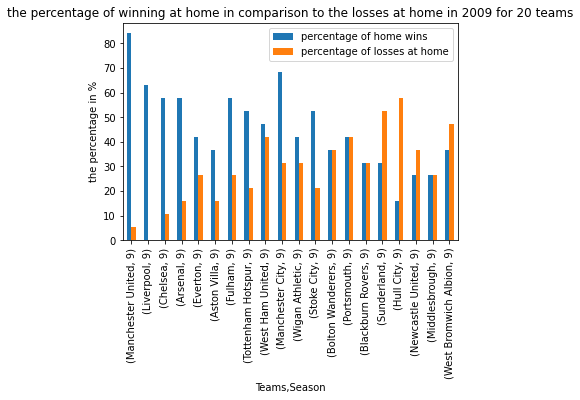

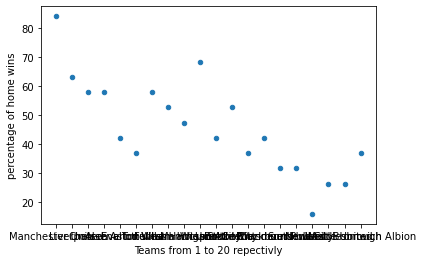

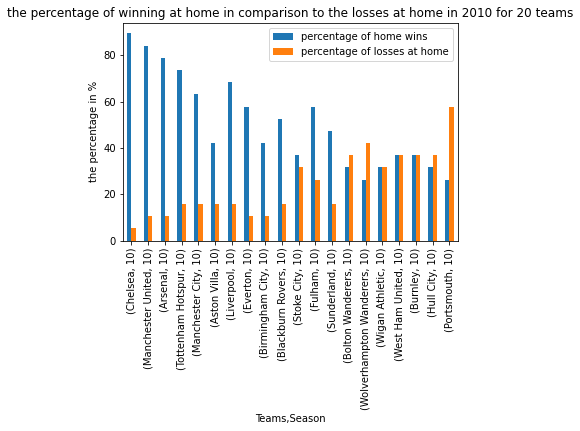

In [50]:
Labels=['Teams','Season','percentage of home wins','percentage of losses at home']
result=pd.read_csv('percentage_of_wins_vs_losses_at_home_in_2009.csv',header=0,names=Labels,index_col=['Teams','Season'])
result.plot.bar()
plt.title('the percentage of winning at home in comparison to the losses at home in 2009 for 20 teams')
plt.ylabel('the percentage in %')
result=pd.read_csv('percentage_of_wins_vs_losses_at_home_in_2009.csv',header=0,names=Labels)
Labels=['Teams','Season','percentage of home wins','percentage of losses at home']
result=pd.read_csv('percentage_of_wins_vs_losses_at_home_in_2010.csv',header=0,names=Labels,index_col=['Teams','Season'])
result.plot.bar()
plt.title('the percentage of winning at home in comparison to the losses at home in 2010 for 20 teams')
plt.ylabel('the percentage in %')


**Figure 2 and 3 winning vs losing percentage for the 20 teams from 1 st to 20th respectively in 2008/2009 and 2009/2010 seasons in England**

The data from the 2009 /2010 season shown in Figure 3 shows the same pattern where the more we move down in the table the home advantage start to fade away so now to be able to answer this questions we have to compare the winning rate at home vs away for the 20 teams in this two seasons .  

Text(0.5, 0, 'the percentage of home wins in %')

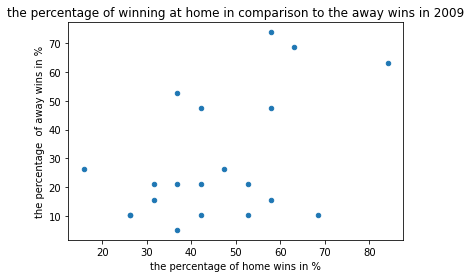

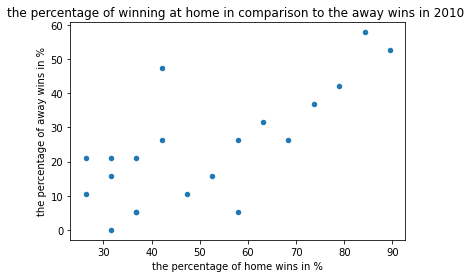

In [7]:
Labels=['Teams','Season','percentage of home wins','percentage of away wins']
result=pd.read_csv('percentage_of_wins_home_and_away_in_2009.csv',header=0,names=Labels,index_col=['Teams','Season'])
result.plot.scatter(x='percentage of home wins',y='percentage of away wins')
plt.title('the percentage of winning at home in comparison to the away wins in 2009')
plt.ylabel('the percentage  of away wins in %')
plt.xlabel('the percentage of home wins in %')
Labels=['Teams','Season','percentage of home wins','percentage of away wins']
result=pd.read_csv('percentage_of_wins_home_and_away_in_2010.csv',header=0,names=Labels,index_col=['Teams','Season'])
result.plot.scatter(x='percentage of home wins',y='percentage of away wins')
plt.title('the percentage of winning at home in comparison to the away wins in 2010 ')
plt.ylabel('the percentage of away wins in %')
plt.xlabel('the percentage of home wins in %')


**Figure 4 and 5 winning  at home vs away percentage for the 20 teams  in 2008/2009 and 2009/2010 seasons in England**

as you can see from the data provided in this scatter plot most of the point lies in the lower half of the scatter plot which indicates the lack of away wins for the teams participating in the English premier league . Furthermore , most of the point which lies in the upper half of the scatter plot moves towards right which indicates that their home winning rate surpass their away winning rate .

Text(0.5, 1.0, 'number of wins for each team as percentage of the total number of wins')

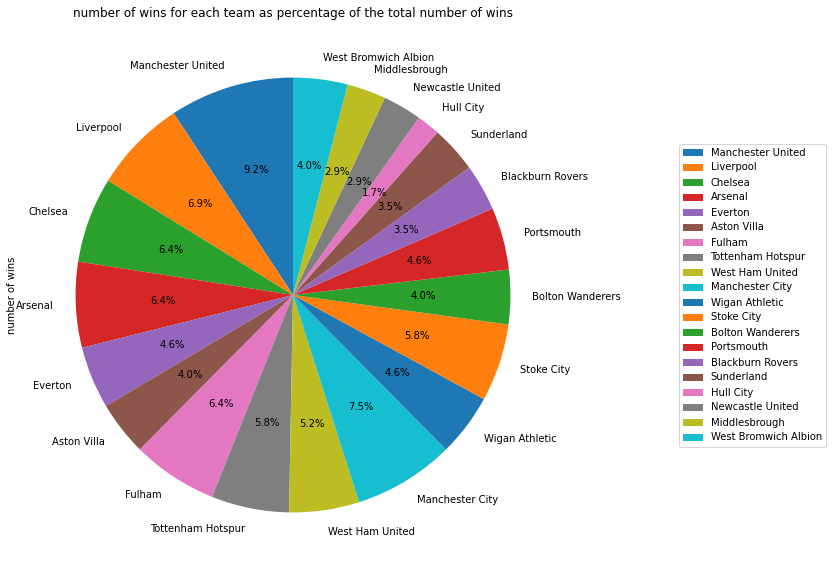

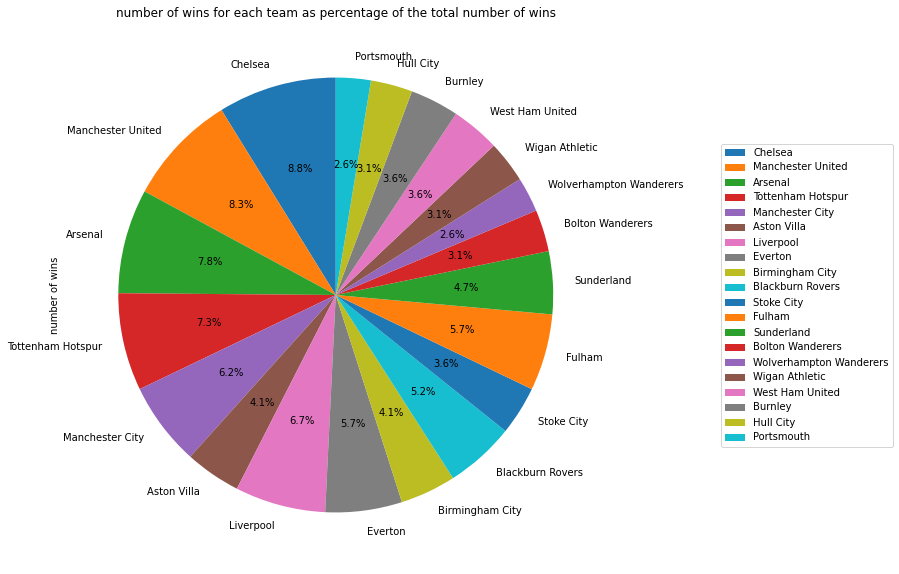

In [35]:
Labels=['Team','Season','number of wins','number of losses']
df_number_of_wins_for_each_team_at_home_in_2009=pd.read_csv('number_of_wins_vs_losses_at_home_in_2009.csv',header=0,names=Labels,index_col='Team') 
df_number_of_wins_for_each_team_at_home_in_2009.plot.pie(y='number of wins',figsize=(10, 10),autopct='%1.1f%%',startangle=90)
plt.legend(loc='center left', bbox_to_anchor=(1.2, .5))
plt.title('number of wins for each team as percentage of the total number of wins in 2009')
Labels=['Team','Season','number of wins','number of losses']
df_number_of_wins_for_each_team_at_home_in_2010=pd.read_csv('number_of_wins_vs_losses_at_home_in_2010.csv',header=0,names=Labels,index_col='Team') 
df_number_of_wins_for_each_team_at_home_in_2010.plot.pie(y='number of wins',figsize=(10, 10),autopct='%1.1f%%', startangle=90)
plt.legend(loc='center left', bbox_to_anchor=(1.2, .5))
plt.title('number of wins for each team as percentage of the total number of wins in 2010')

**this two pie charts splits the wins of the home teams(173 in 2009 and 193 in 2010 a decribed below) between the 20 teams in the competition**

In [26]:
Labels=['England','Season','number of home wins','number of losses at home']
result_for_England=pd.read_csv('number_of_wins_vs_losses_at_home_in_England_in_multiple_seasons.csv',header=0,names=Labels)
result_for_England.head()


,England,Season,number of home wins,number of losses at home
0,England,9,173,110
1,England,10,193,91
2,England,11,179,90
3,England,12,171,116
4,England,13,166,106


,number of wins at home
wins from upper half teams,124
wins from lower half teams,69


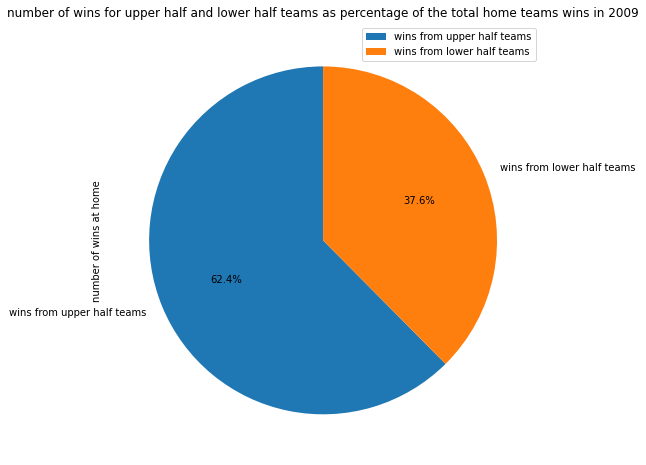

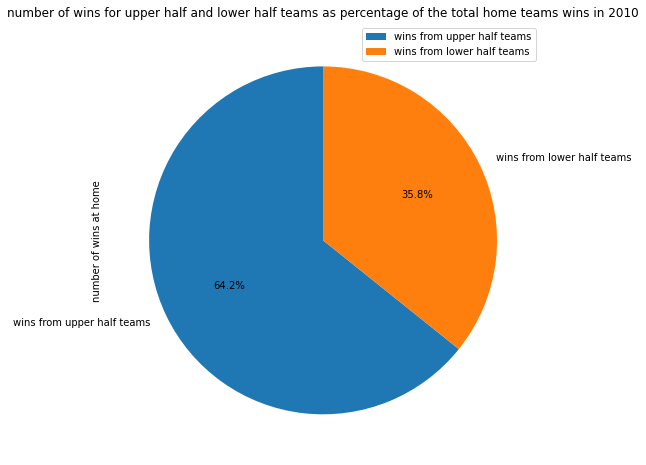

In [39]:
import pandas as pd
total_upper_half = df_number_of_wins_for_each_team_at_home_in_2009.iloc[0:10].sum()
total_lower_half = df_number_of_wins_for_each_team_at_home_in_2009.iloc[10:20].sum()
df=pd.DataFrame({'number of wins at home':[total_upper_half['number of wins'],total_lower_half['number of wins']]},index=['wins from upper half teams','wins from lower half teams'])
df.plot.pie(y='number of wins at home',figsize=(8, 8),autopct='%1.1f%%', startangle=90)
plt.title('number of wins for upper half and lower half teams as percentage of the total home teams wins in 2009')
total_upper_half = df_number_of_wins_for_each_team_at_home_in_2010.iloc[0:10].sum()
total_lower_half = df_number_of_wins_for_each_team_at_home_in_2010.iloc[10:20].sum()
df=pd.DataFrame({'number of wins at home':[total_upper_half['number of wins'],total_lower_half['number of wins']]},index=['wins from upper half teams','wins from lower half teams'])
df.plot.pie(y='number of wins at home',figsize=(8, 8),autopct='%1.1f%%', startangle=90)
plt.title('number of wins for upper half and lower half teams as percentage of the total home teams wins in 2010')
df.head()

now looking at this two pie charts show that more than 60 % of wins at home  wins came from the top 10 teams in the competition while the remaining percentage which less than 40%  came from the team from 11 to 20  this results for two consecutive seasons 2009 and 2010 .so is that mean the home advantage is just for the strong teams while the weak teams doesnt have that advantage ? to answer this question we have to compare the number of winning for this lower half 10 teams at home and away. 

Text(0.5, 1.0, 'number of wins for upper half and lower half teams as percentage of the total number of wins in 2010')

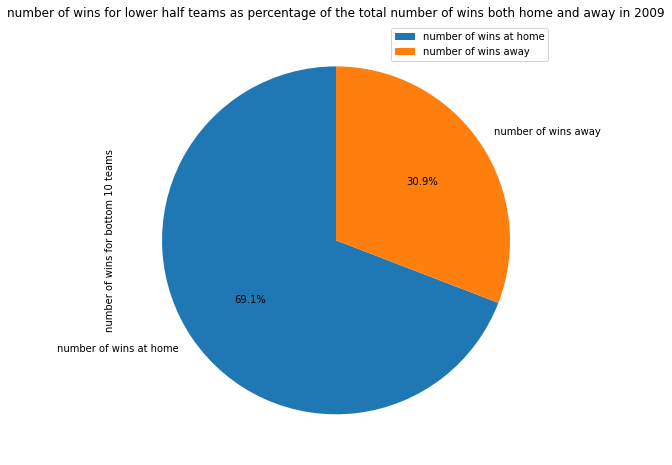

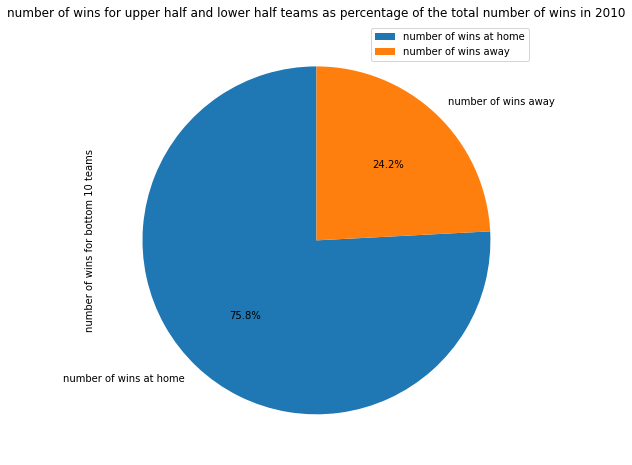

In [40]:
Labels=['Team','Season','number of wins at home','number of wins away']
df=pd.read_csv('number_of_wins_home_and_away_in_2009.csv',header=0,names=Labels,index_col='Team')
total_lower_half = df.iloc[10:20].sum()
total_lower_half.head()
df=pd.DataFrame({'number of wins for bottom 10 teams':[total_lower_half['number of wins at home'],total_lower_half['number of wins away']]},index=['number of wins at home','number of wins away'])
df.plot.pie(y='number of wins for bottom 10 teams',figsize=(8, 8),autopct='%1.1f%%', startangle=90)
plt.title('number of wins for lower half teams as percentage of the total number of wins both home and away in 2009')
Labels=['Team','Season','number of wins at home','number of wins away']
df=pd.read_csv('number_of_wins_home_and_away_in_2010.csv',header=0,names=Labels,index_col='Team')
total_lower_half = df.iloc[10:20].sum()
total_lower_half.head()
df=pd.DataFrame({'number of wins for bottom 10 teams':[total_lower_half['number of wins at home'],total_lower_half['number of wins away']]},index=['number of wins at home','number of wins away'])
df.plot.pie(y='number of wins for bottom 10 teams',figsize=(8, 8),autopct='%1.1f%%', startangle=90)
plt.title('number of wins for upper half and lower half teams as percentage of the total number of wins in 2010')
#df.head()

**this Two pie charts show that at least 70% of the wins for the teams ranked from 10 to 20 came at home soil which support the claim home soil give a great advatnage to the team playing at home**

# conclusion

* the home advantage for teams is an important topic in world football . in competitions such as "Euefa champions league " some team can proceed to further stages due to the home advantage . this project is part one of two parts I am intending to introduce the second part is the effect of the home supporters and for that I will use the data from current season .anyway in this part the home advantage investigated .
* we looked at the problem from different angles the first angle is just checking how many games won by the home team and how many games won by the away team across multiple seasons in one country in this analysis it was England . 
* the second angle what is the relation between how strong the team is with the number of game at home soil or away .for that we determine strong or weak by the league position .
* then the last angle does the home advantage dissapear for the teams who are considered as weak team which are in the lower half of the table 
* the finding is really intersting take closer look to the data shows that it supports the home team advantage. the reason for that is some teams such as Hull city  which didn’t win a single game away from home had a record of almost 30 % winning rate at home and despite that they lost almost 40% of their home games but yet they managed to win almost 5 games at home while they were not able to win a single game away from home .the same can be said about Burnley and west ham united who managed to win just single game away while they were able to win almost 7 games at home in 2010 season 



## limitation 
* the data doesn`t give any information regarding the squad availability for the home team or the away team as missing key players can affect the result of the game.
* the data also doesnt give any information about when was the last game the home or the away team played their game as it can affect the performance of the teams.
* the data doesnt give any information regarding the weather condition in which the games were played a it can clearly affects the result of the game.
* the data also doesn`t provide information about the crowd that every tadium can hold for instance old traford the home for Manchester united have an avearge attendance of 57000 upporters while bournmouth have only 7000 which is big variation and for sure affects the final result of the game .
